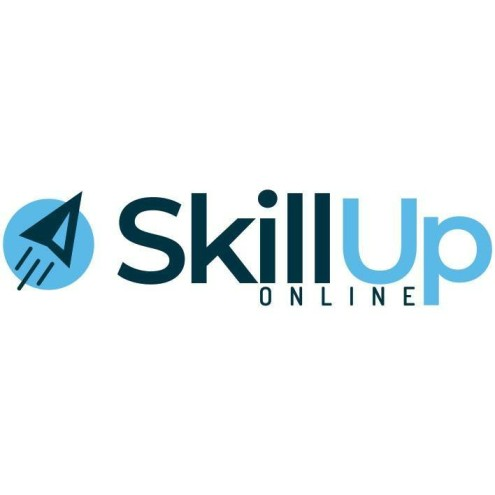

# **Détection de la fraude à la carte bancaire**















Lien pour télécharger le dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud













### Importez les bibliothèques nécessaires

In [1]:
#  Importez les bibliothèques nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Importez et lisez le dataset

In [2]:
# Extrayez les données dans un Dataframe

credit_card_transactions_df = pd.read_csv("creditcard.csv")
credit_card_transactions_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### Nettoyage de données

a. Nettoyage des valeurs manquantes

In [3]:
#Ecrivez votre code ici
credit_card_transactions_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

b. Données répétées

In [4]:
#Ecrivez votre code ici
credit_card_transactions_df.duplicated().sum()

1081

### Analyse des données


Première question : Quel est le pourcentage de transactions frauduleuses?


In [5]:
# Calculez le pourcentage de transactions frauduleuses
percentage_of_fraudulent_transactions = credit_card_transactions_df['Class'].mean() * 100
# Imprimez le pourcentage que vous obtenez
print("Le pourcentage de transactions frauduleuses s'élève à : %.2f%%" % percentage_of_fraudulent_transactions)

Le pourcentage de transactions frauduleuses s'élève à : 0.17%



Deuxième question: A combien s'élève en moyenne le montant des transactions frauduleuses ?


In [6]:
# Calculez le montant moyen des transactions frauduleuses

# Filtrer les transactions frauduleuses
fraudulent_transactions = credit_card_transactions_df[credit_card_transactions_df['Class'] == 1]
# Calculer le montant moyen des transactions frauduleuses
average_fraudulent_transaction_amount = fraudulent_transactions['Amount'].mean()

# Imprimez le résultat obtenu
print(f"Le montant moyen des transactions frauduleuses est de : {average_fraudulent_transaction_amount:.2f}")

Le montant moyen des transactions frauduleuses est de : 122.21


### Visualisation des données


Première question : Quelle est la proportion de transactions frauduleuses par rapport aux transactions non frauduleuses ? (Utilisez un diagramme à barres)

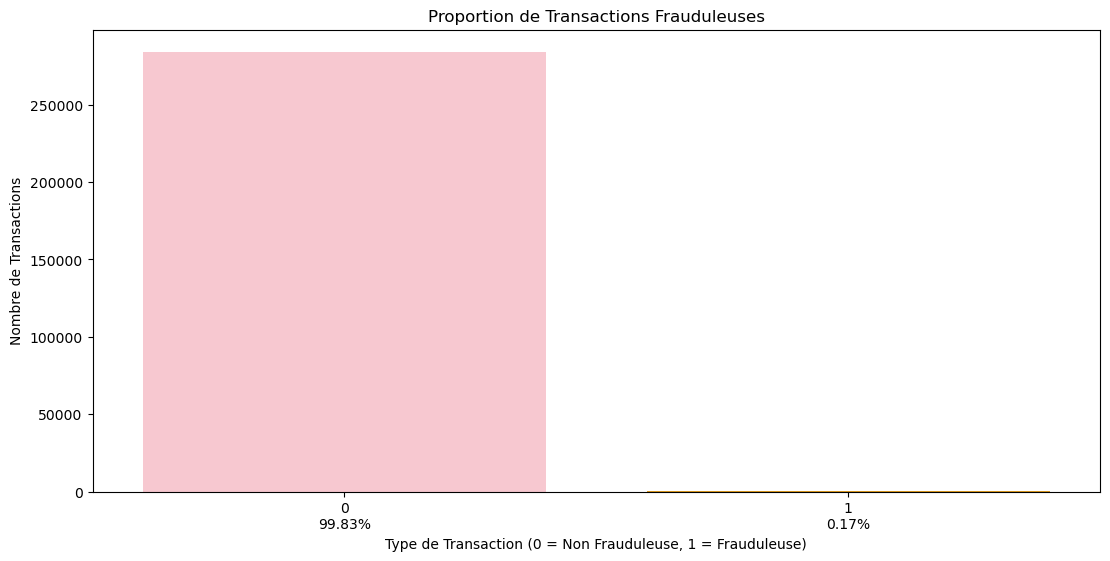

In [8]:
# Calculez le nombre de transactions frauduleuses et non frauduleuses
percentage_of_non_fraudulent_transactions = 100 - percentage_of_fraudulent_transactions 

''' Représentez la distribution des transactions frauduleuses par rapport aux transactions non frauduleuses :
# 1 Créer le graphique à barres : '''
plt.figure(figsize=(13, 6)) 
axes = sns.countplot(x='Class', data=credit_card_transactions_df, palette=['pink', 'orange'])

# Ajouter un titre et des étiquettes
plt.title('Proportion de Transactions Frauduleuses')
plt.xlabel("Type de Transaction (0 = Non Frauduleuse, 1 = Frauduleuse)")
plt.ylabel("Nombre de Transactions")

# Ajouter les pourcentages sous les barres

axes.set_xticklabels([f'0\n{percentage_of_non_fraudulent_transactions:.2f}%', 
                    f'1\n{percentage_of_fraudulent_transactions:.2f}%'])


# Afficher le graphique
plt.show()

2e question: Quelle est la distribution des montants des transactions frauduleuses ? (Utilisez un histogramme)


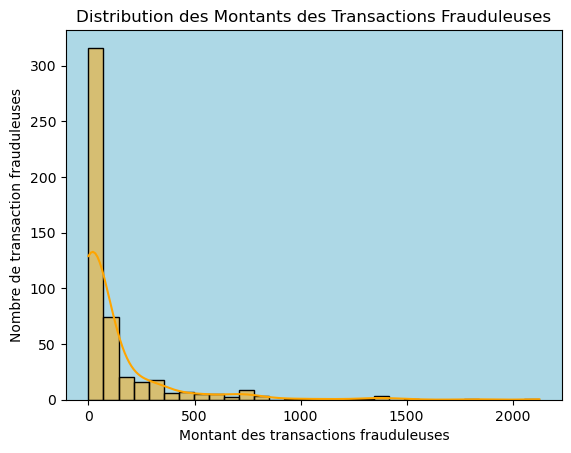

In [10]:
# Séparez les données concernant les transactions frauduleuses
fraudulent_transactions = credit_card_transactions_df[credit_card_transactions_df['Class'] == 1]

#  Illustrez la distribution relative aux montants des transactions frauduleuses.
sns.histplot(fraudulent_transactions['Amount'], bins=30, kde=True, color='orange')
# Changer la couleur de fond
plt.gca().set_facecolor('lightblue')

# Ajouter un titre et des étiquettes
plt.title('Distribution des Montants des Transactions Frauduleuses')
plt.xlabel("Montant des transactions frauduleuses")
plt.ylabel("Nombre de transaction frauduleuses")

plt.show()

### Développement et évaluation du modèle

### Fractionner un dataset

In [11]:
# Entraîner et tester les fractionnements 

# Importer la fonction train_test_split de scikit-learn
from sklearn.model_selection import train_test_split

# Séparer les caractéristiques de la variable cible 
X = credit_card_transactions_df.drop(columns='Class')
y = credit_card_transactions_df['Class']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modélisation et évaluation

In [12]:
#écrivez votre code ici

# Importer les bibliothèques nécessaires
from sklearn.ensemble import RandomForestClassifier # classificateur basé sur une forêt d’arbres de décision
from sklearn.metrics import classification_report, accuracy_score # fonctions pour évaluer les performances du modèle

model = RandomForestClassifier(max_depth=150, random_state=42)

# Entraînement du modèle et prédiction
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Évaluation du modèle
print(classification_report(y_test, y_pred))
print(f"Précision du modèle : {accuracy_score(y_test, y_pred) * 100:.2f}%")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Précision du modèle : 99.96%
